### Week 2 - Stats and Hypotesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cab Data

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head(20)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [3]:
cab_data.isna().sum() # is there a missing data?

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [4]:
def redefine_id(value):
    value = value - 10000010	
    return value

cab_data["Transaction ID"] = cab_data["Transaction ID"].apply(redefine_id)
cab_data.head(20) #redefine the ids

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,1,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,2,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,3,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,4,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,5,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,6,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,7,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,8,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,9,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [5]:
def _date(value):
    base_time = pd.Timestamp("1899-12-30")
    this_date = pd.DateOffset(value)
    return base_time + this_date
result_date = _date(42377)
print(result_date)

2016-01-08 00:00:00


In [6]:
int_rpe_date = cab_data["Date of Travel"].values.tolist()
new_dates = []
for elm in int_rpe_date:
    new_dates.append(_date(elm))
cab_data["Date of Travel"] = pd.to_datetime(new_dates, format = '%y/%m/%d')

In [7]:
print(cab_data["Date of Travel"].min())
print(cab_data["Date of Travel"].max())
# the range

2016-01-02 00:00:00
2018-12-31 00:00:00


In [8]:
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,1,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,2,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,3,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,4,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,5,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,6,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,7,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,8,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,9,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [9]:
cab_data.shape

(359392, 7)

In [10]:
cab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,220751.185363,126805.803715,1.0,110799.7500,221025.50,330927.2500,440097.00
KM Travelled,359392.0,22.567254,12.233526,1.9,12.0000,22.44,32.9600,48.00
Price Charged,359392.0,423.443311,274.378911,15.6,206.4375,386.36,583.6600,2048.03
Cost of Trip,359392.0,286.190113,157.993661,19.0,151.2000,282.48,413.6832,691.20


In [11]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [12]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

### City

In [13]:
city_file = pd.read_csv("City.csv")
city_file.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [14]:
city_file.isna().sum() # is there a missing data

City          0
Population    0
Users         0
dtype: int64

In [15]:
city_file.shape

(20, 3)

In [16]:
city_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
# we see that population and user values are represented as objects , we need to convert them into integers so we can analyse
# it better

In [18]:
def str_to_int(value):
    number = int(value.replace(",",""))
    return number
city_file["Population"] = [str_to_int(elm) for elm in city_file["Population"]]
city_file["Users"] = [str_to_int(elm) for elm in city_file["Users"]]
city_file.head(10)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [19]:
city_file.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1231592.00,1.740127e+06,248968.0,608637.25,784559.0,1067041.0,8405837.0
Users,20.0,64520.65,8.349938e+04,3643.0,11633.25,23429.0,91766.0,302149.0


In [20]:
len(city_file["City"].unique())

20

### Costumer_Id

In [21]:
costumers = pd.read_csv("Customer_ID.csv")
costumers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [22]:
costumers.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [23]:
costumers.shape

(49171, 4)

In [24]:
costumers.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [25]:
costumers.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [26]:
costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
### Transaction

In [28]:
transaction = pd.read_csv("Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [29]:
transaction.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [30]:
transaction["Transaction ID"] = transaction["Transaction ID"].apply(redefine_id)
transaction.head(20) #redefine the ids

,Transaction ID,Customer ID,Payment_Mode
0,1,29290,Card
1,2,27703,Card
2,3,28712,Cash
3,4,28020,Cash
4,5,27182,Card
5,6,27318,Cash
6,7,33788,Card
7,8,34106,Card
8,9,59799,Cash
9,10,57982,Cash


In [31]:
transaction.shape

(440098, 3)

In [32]:
transaction.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [33]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [34]:
transaction.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,220049.50000,127045.493722,1.0,110025.25,220049.5,330073.75,440098.0
Customer ID,440098.0,23619.51312,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [35]:
### Reading part is done , lets go through the implementing part
### overall datasets , there is no missing data i caught.i changed the id values with normal range starts from 1. I also
### changed the required columns with the understandable ones.

In [36]:
df = cab_data.merge(transaction, on="Transaction ID").merge(costumers, on="Customer ID").merge(city_file, on="City")
df.head(20)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,1,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,351117,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,412911,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,2,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,320484,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,324727,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,395616,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,3,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,79394,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,186984,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [37]:
df.shape

(359392, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

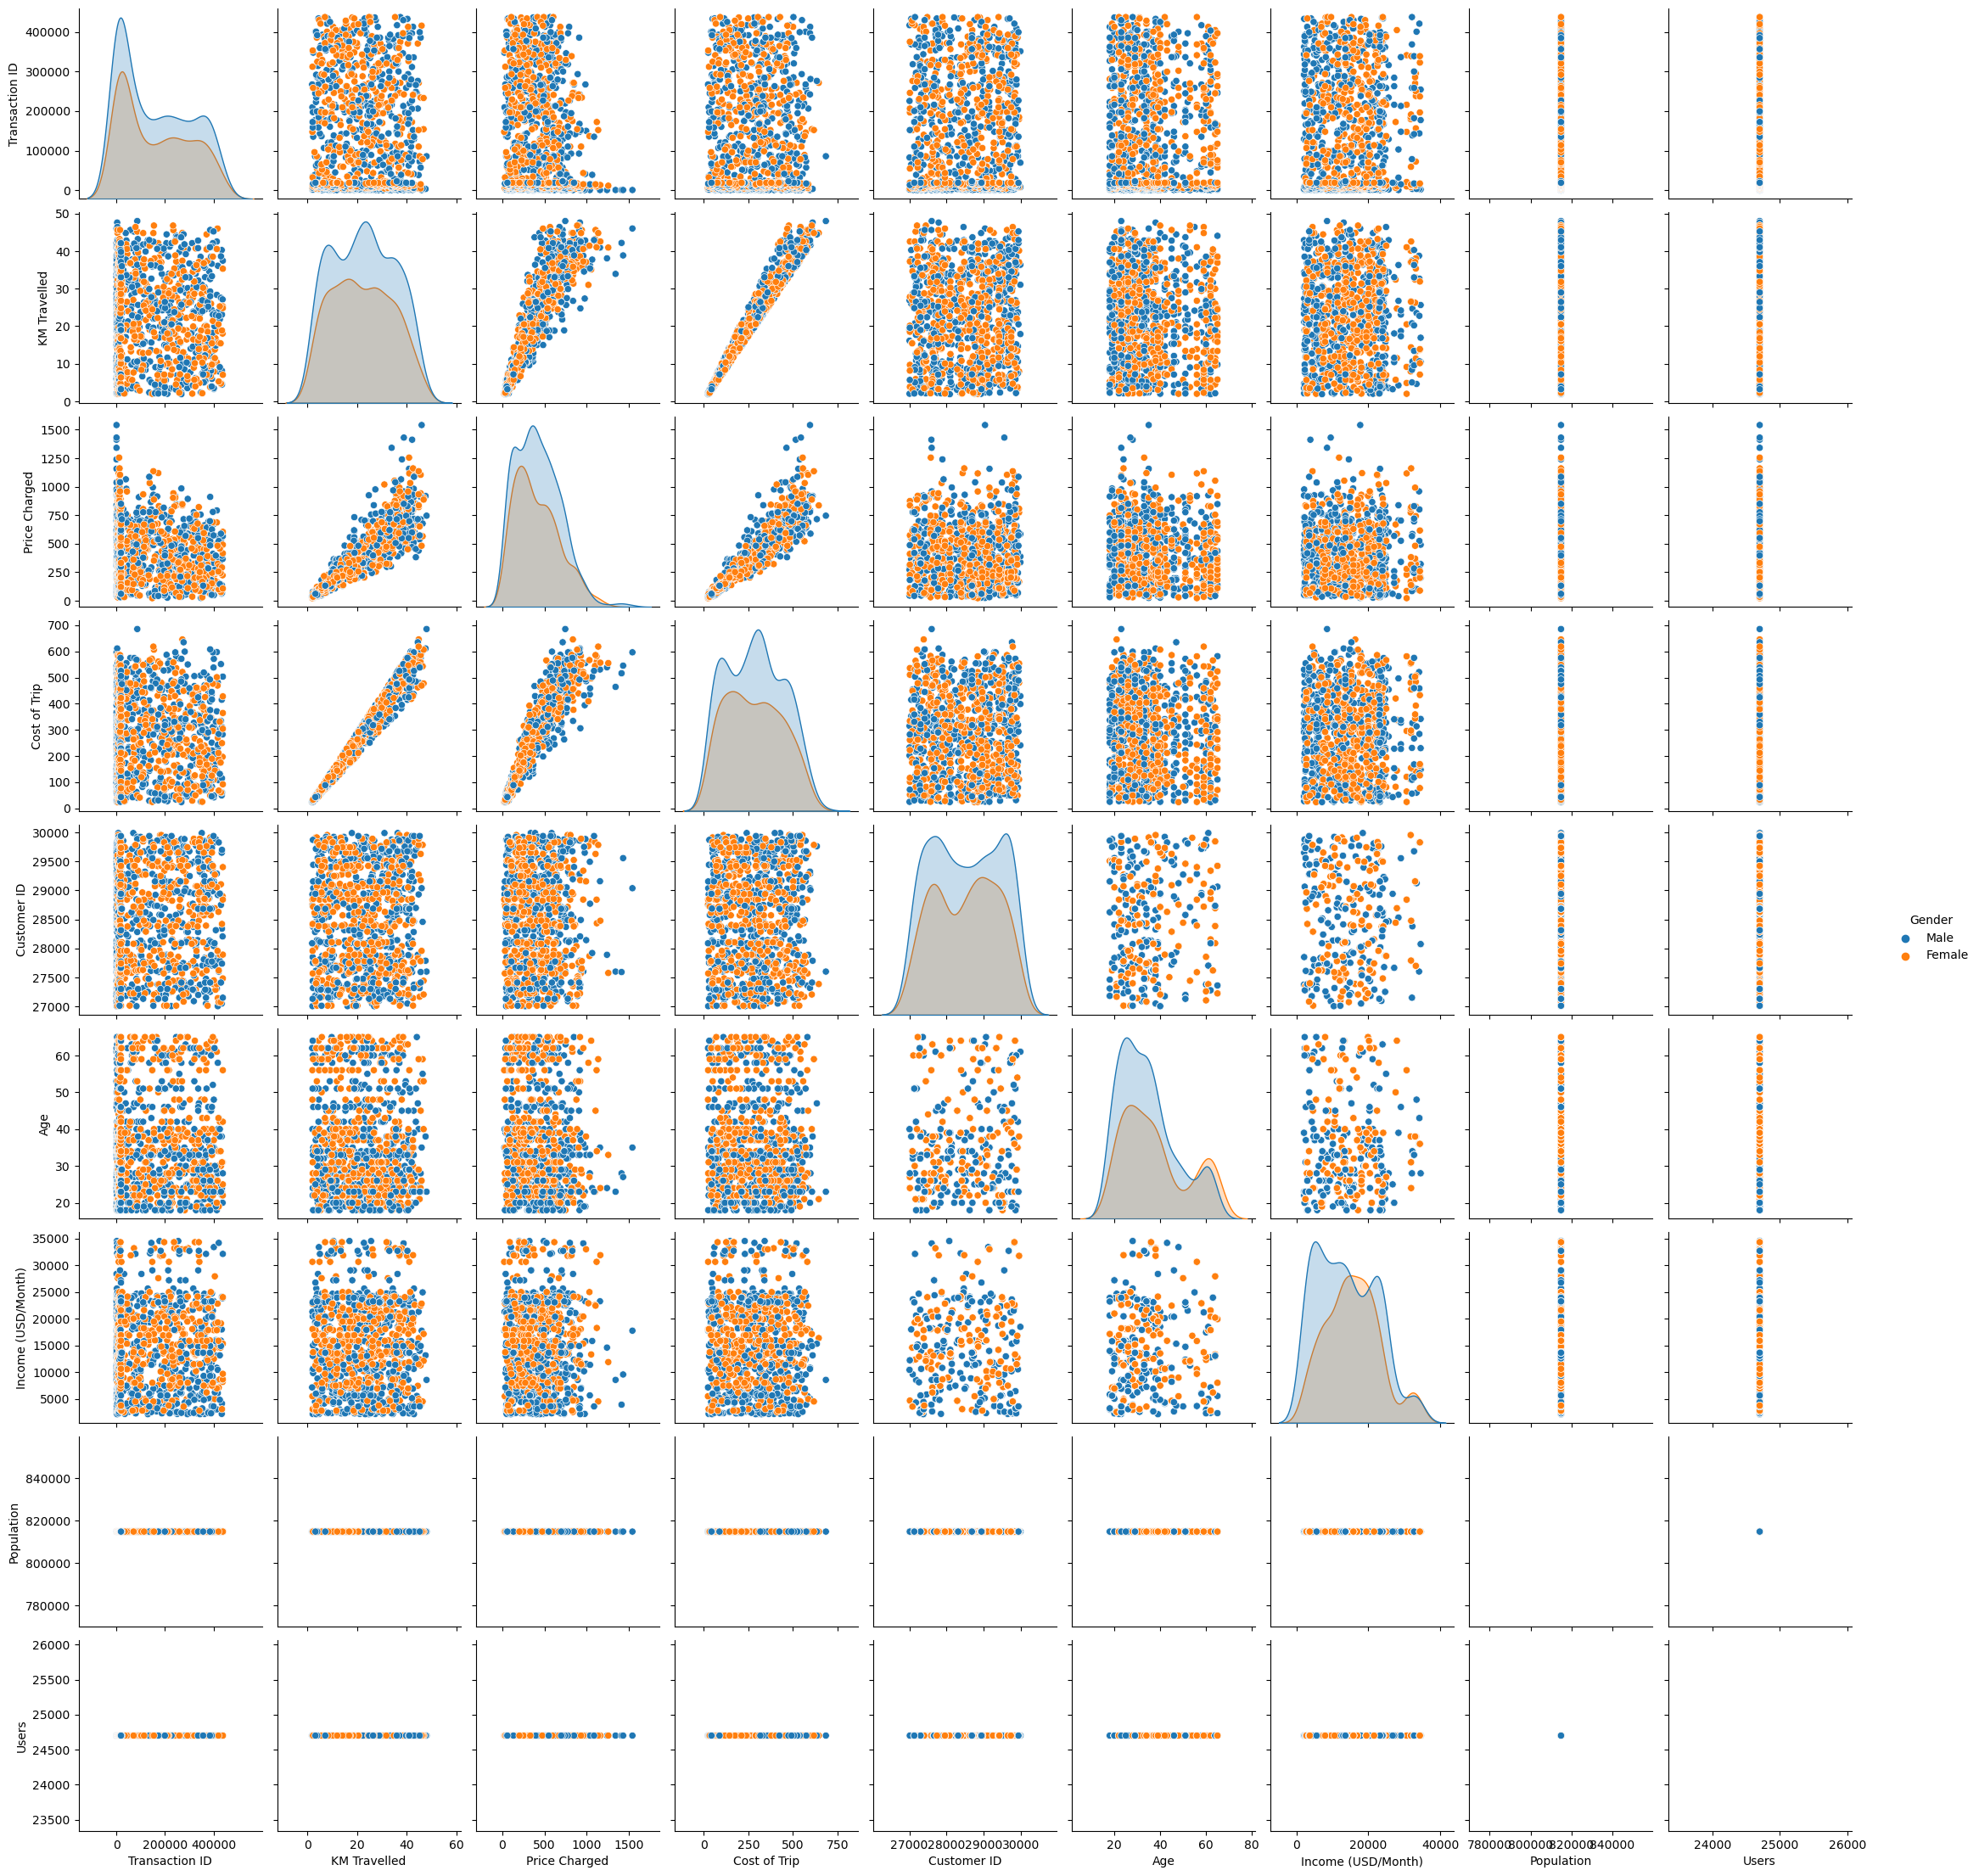

In [39]:
sns.pairplot(df.head(1000), hue = "Gender");

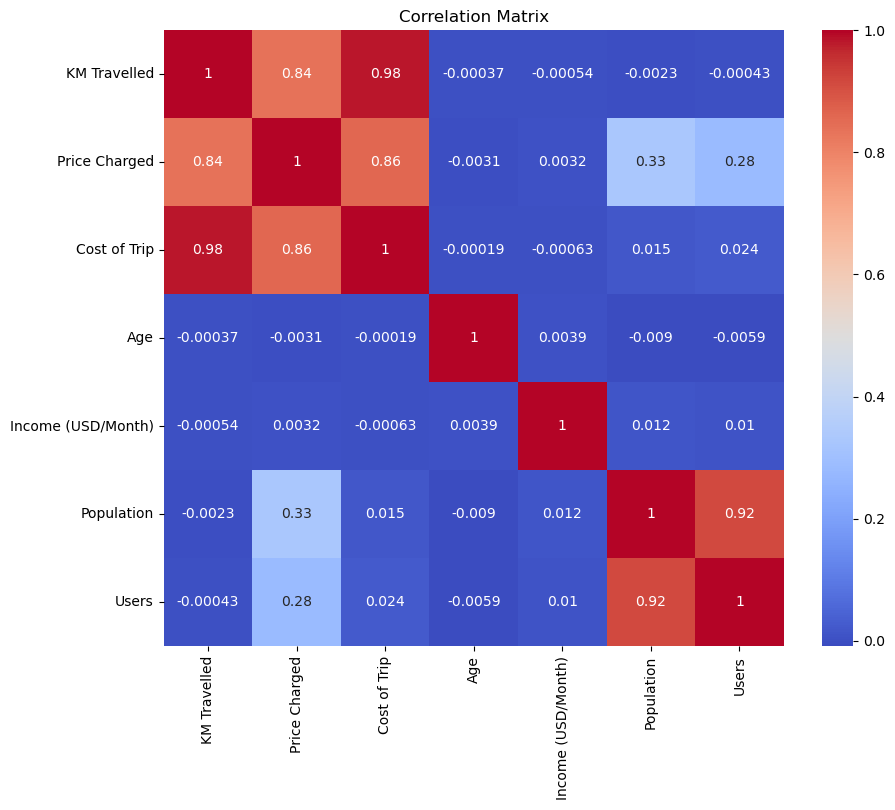

In [40]:
corr = df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [41]:
## As we can see here that , there is a strong correlation between Population and Users , as we expected . Also we can say that
## there are very strong connections between Km travelled , Price Charged and Cost of Trip (Especially Km and Cost). Price charged
## is not that depends on User or Population numbers , and there is no such correlation for Age and Income values between other
## values.

In [42]:
### Analysis between other variables

## Company

<AxesSubplot:xlabel='Company', ylabel='Price Charged'>

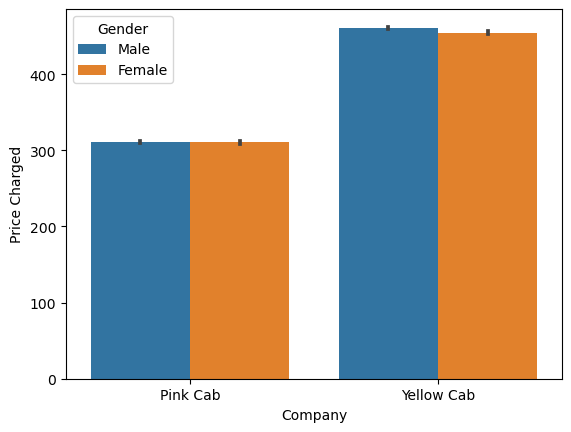

In [39]:
sns.barplot(x = "Company", y = "Price Charged", hue = "Gender", data = df)

In [131]:
# We can see here that Yellow Cab is charged more money than Pink cab in both Genders , Yellow Cab is more expensive maybe we
# say.

<AxesSubplot:xlabel='Company', ylabel='Cost of Trip'>

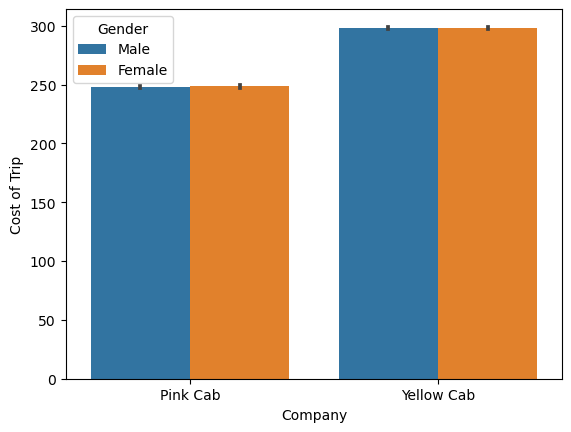

In [40]:
sns.barplot(x = "Company", y = "Cost of Trip", hue = "Gender", data = df)

In [41]:
## İf we checked this graph , we maybe think that the service price is a bit expensive in Yellow Cab for Pink Cab.

<AxesSubplot:xlabel='Company', ylabel='Users'>

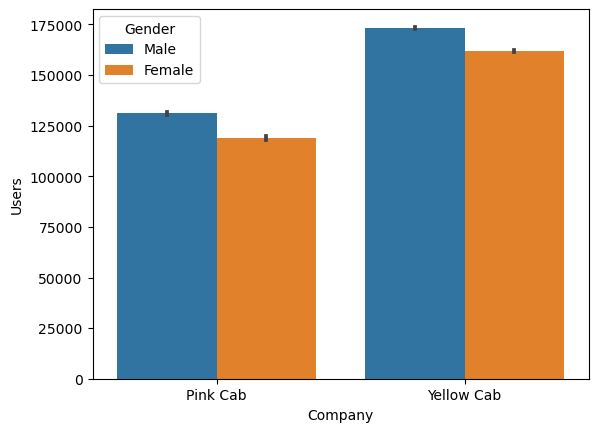

In [42]:
sns.barplot(x = "Company", y = "Users", hue = "Gender", data = df)

In [43]:
## We can also confirm that the Yellow Cab has more users.

<AxesSubplot:xlabel='Company', ylabel='Income (USD/Month)'>

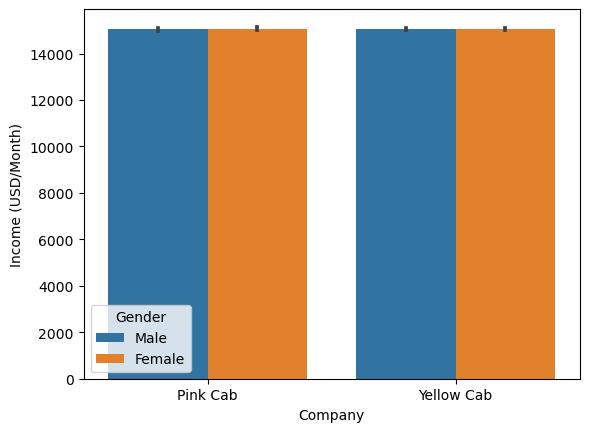

In [44]:
sns.barplot(x = "Company", y = "Income (USD/Month)", hue = "Gender", data = df)

In [50]:
# The incomes between Companies , even Genders are the same.

In [51]:
# From the correlations , we can say that Yellow Cab is more preferable in crowded Cities.

### Cities

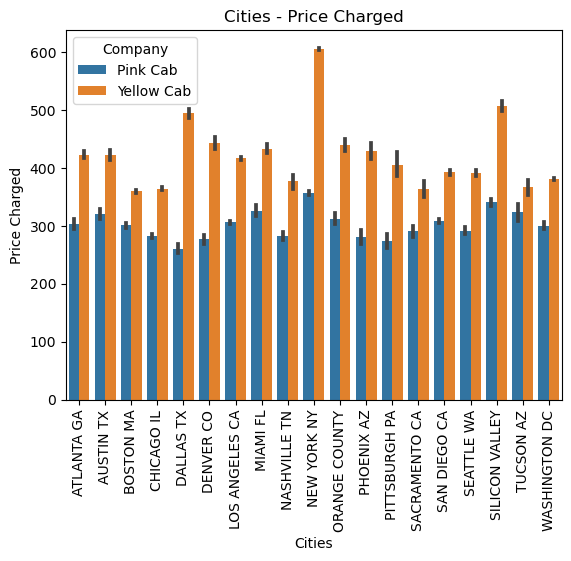

In [45]:
sns.barplot(x = "City", y = "Price Charged",hue = "Company", data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Cities - Price Charged")  # Add a title to the plot
plt.xlabel("Cities")  # Add a label to the x-axis
plt.ylabel("Price Charged")  # Add a label to the y-axis
plt.show()

In [46]:
## We can see here that at NYC , The charging value becomes the most , rest of the cities are not that changing. Also we can 
## clearly see that Yellow cab charged more than Pink Cab.

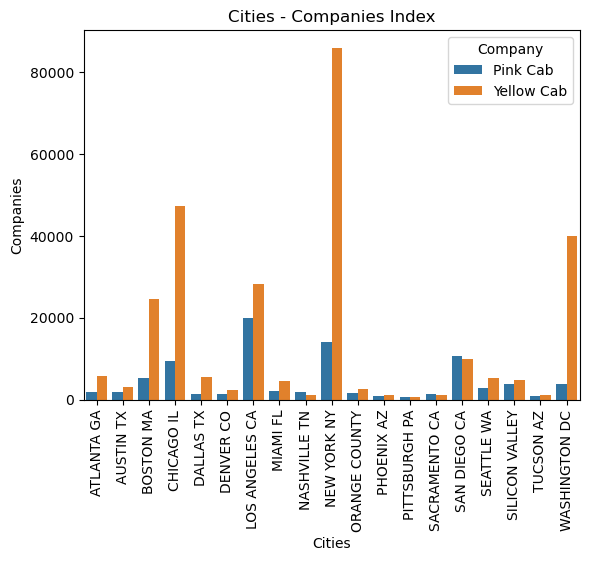

In [47]:
sns.countplot(x = "City",hue = "Company" ,data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Cities - Companies Index")  # Add a title to the plot
plt.xlabel("Cities")  # Add a label to the x-axis
plt.ylabel("Companies")  # Add a label to the y-axis
plt.show()

In [48]:
## Clearly Yellow cab is preffered more than Pink Cab , except Nashville TN and San Diego CA.

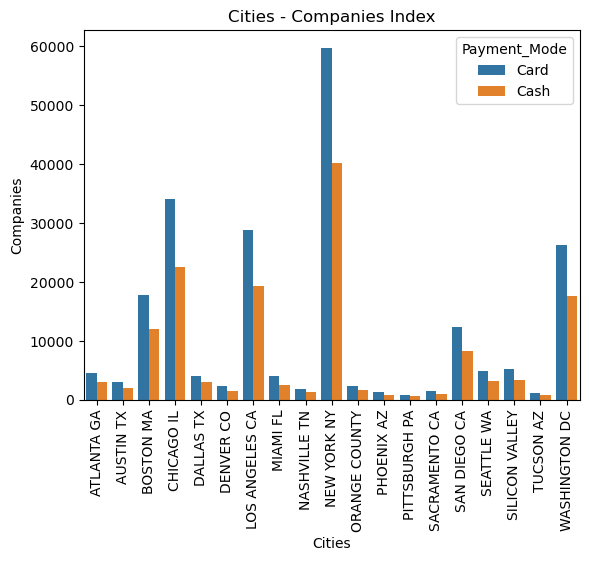

In [49]:
sns.countplot(x = "City",hue = "Payment_Mode" ,data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Cities - Companies Index")  # Add a title to the plot
plt.xlabel("Cities")  # Add a label to the x-axis
plt.ylabel("Companies")  # Add a label to the y-axis
plt.show()

In [57]:
## Also We can clearly see that Card is preffered more than Cash.

In [58]:
# Extract month and year components
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year
## i made two other columns named month an year for every row.
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Month,Year
0,1,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,1,2016
1,351117,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,7,2018
2,412911,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,11,2018
3,2,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,1,2016
4,320484,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,4,2018


In [59]:
df["Month"].value_counts()

12    47007
11    42700
10    40852
9     36859
8     31323
7     27676
6     24713
5     23701
1     23174
3     21646
4     21434
2     18307
Name: Month, dtype: int64

In [60]:
df["Year"].value_counts()

2017    128510
2018    123563
2016    107319
Name: Year, dtype: int64

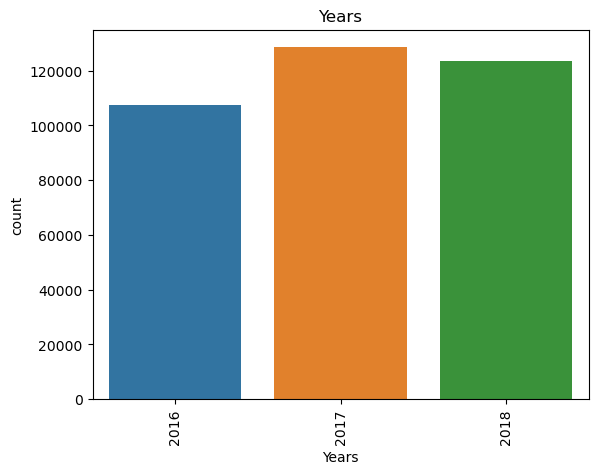

In [61]:
sns.countplot(x = "Year" ,data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Years")  # Add a title to the plot
plt.xlabel("Years")  # Add a label to the x-axis  
plt.show()

In [62]:
## in 2017 , there was the most usage of cab companies.

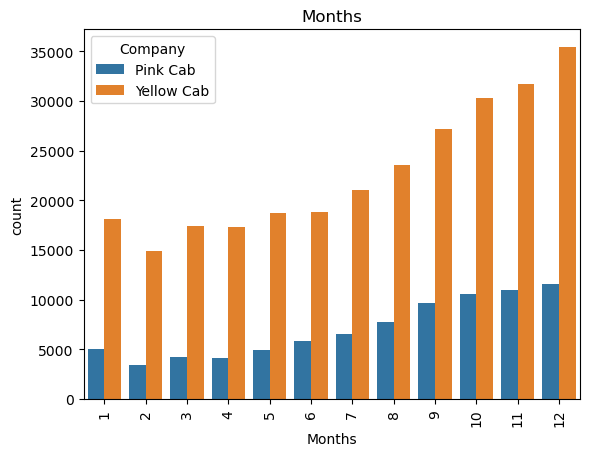

In [63]:
sns.countplot(x = "Month",hue = "Company" ,data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Months")  # Add a title to the plot
plt.xlabel("Months")  # Add a label to the x-axis  
plt.show()

In [64]:
## also we can clearly see that , especially in Autumn and Winter , there was the most usage .

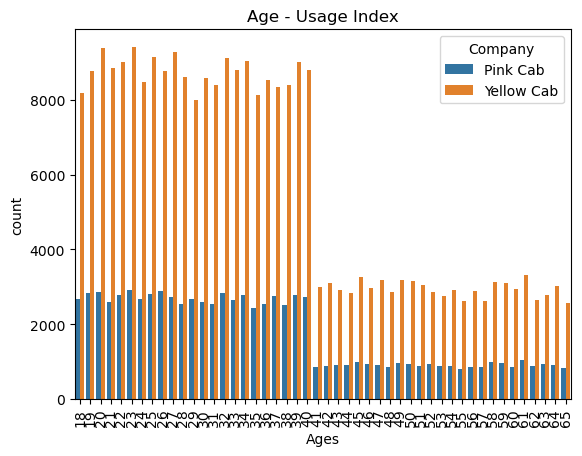

In [65]:
sns.countplot(x = "Age",hue = "Company",data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Age - Usage Index")  # Add a title to the plot
plt.xlabel("Ages")  # Add a label to the x-axis  
plt.show()
        

In [66]:
## We can clearly see that there is a HUGE change when the age value becomes bigger than 40 , mostly young people using
## this companies.

In [67]:
aList = []
for elm in df["Age"]:
    if elm < 41 :
        aList.append("Young Adult")
    else:
        aList.append("Old")
df["Age Range"] = aList

In [68]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Month,Year,Age Range
0,1,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,1,2016,Young Adult
1,351117,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,7,2018,Young Adult
2,412911,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,11,2018,Young Adult
3,2,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,1,2016,Young Adult
4,320484,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,4,2018,Young Adult


In [69]:
file_path = 'all_data.csv'
df.to_csv(file_path, index=False)

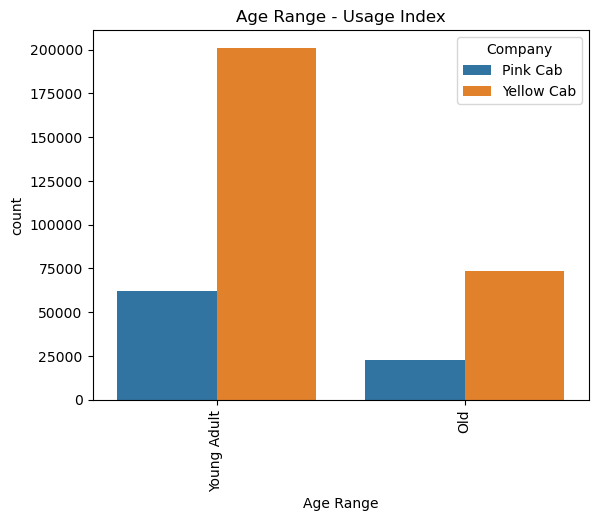

In [70]:
sns.countplot(x = "Age Range",hue = "Company" ,data = df)
plt.xticks(rotation = 90)  # Rotate the x-axis
plt.title("Age Range - Usage Index")  # Add a title to the plot
plt.xlabel("Age Range")  # Add a label to the x-axis  
plt.show()

In [71]:
###  We can see the difference - it's huge !!!

In [72]:
### To see the results more clearly , let's generate some hypotesis and use them to get some more information.

In [73]:
### Hypotesis 1: Is there any difference between the Company Profits depends on Age?

In [74]:
### Yellow Cab

In [75]:
from scipy import stats

df['Profit'] = df['Price Charged'] - df['Cost of Trip']

young_ages = df[(df['Age'] < 45) & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()
old_ages = df[(df['Age'] >= 45) & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(young_ages, old_ages, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Age Ranges.")
else:
    print("There is no significant difference in profit between Age Ranges.")


The P value is:  0.23569345002381506
There is no significant difference in profit between Age Ranges.


In [76]:
### Pink Cab

In [77]:
young_ages = df[(df['Age'] < 45) & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()
old_ages = df[(df['Age'] >= 45) & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(young_ages, old_ages, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Age Ranges.")
else:
    print("There is no significant difference in profit between Age Ranges.")

The P value is:  0.42174125382434335
There is no significant difference in profit between Age Ranges.


In [78]:
### For the boht companies , we can say that there is no significant change in Profits based on their ages.

In [79]:
### Hypothesis 2 : Is there a Significant change on Profit depends on the Genders ? 

In [80]:
males = df[(df['Gender'] == "Male") & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()
females = df[(df['Gender'] == "Female") & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(males, females, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Populations.")
else:
    print("There is no significant difference in profit between Populations.")

The P value is:  6.060473042494056e-25
There is a significant difference in profit between Populations.


In [81]:
males = df[(df['Gender'] == "Male") & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()
females = df[(df['Gender'] == "Female") & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(males, females, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Populations.")
else:
    print("There is no significant difference in profit between Populations.")

The P value is:  0.11515305900425798
There is no significant difference in profit between Populations.


In [82]:
## We can clearly see that There is no difference for Pink Cab , but for the Yellow cab , there is a dignificant difference.

In [83]:
### Hypothesis 3 : Is there a difference between Profits depends on the Incomes ? 

In [84]:
males = df[(df['Income (USD/Month)'] >= 10000) & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()
females = df[(df['Income (USD/Month)'] < 10000) & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(males, females, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Incomes.")
else:
    print("There is no significant difference in profit between Incomes.")

The P value is:  9.161789524639662e-10
There is a significant difference in profit between Incomes.


In [85]:
males = df[(df['Income (USD/Month)'] >= 10000) & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()
females = df[(df['Income (USD/Month)'] < 10000) & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(males, females, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Incomes.")
else:
    print("There is no significant difference in profit between Incomes.")

The P value is:  0.40270043417947954
There is no significant difference in profit between Incomes.


In [86]:
### For the Yellow cab , there is a difference for the incomes , but for the Pink cab , we cant say that.

In [87]:
### Hypothesis 4 : Is there a profit difference based on their Payment Methods?

In [88]:
young_ages = df[(df['Payment_Mode'] == "Card") & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()
old_ages = df[(df['Payment_Mode'] == "Cash") & ((df["Company"] == "Pink Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(young_ages, old_ages, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Payment Methods.")
else:
    print("There is no significant difference in profit between Payment Methods.")

The P value is:  0.7900465828793286
There is no significant difference in profit between Payment Methods.


In [89]:
young_ages = df[(df['Payment_Mode'] == "Card") & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()
old_ages = df[(df['Payment_Mode'] == "Cash") & ((df["Company"] == "Yellow Cab"))].groupby('Transaction ID')['Profit'].mean()

_, p_value = stats.ttest_ind(young_ages, old_ages, equal_var=True)
print("The P value is: ", p_value)

if p_value < 0.05:
    print("There is a significant difference in profit between Payment Methods.")
else:
    print("There is no significant difference in profit between Payment Methods.")

The P value is:  0.2933060638298729
There is no significant difference in profit between Payment Methods.


In [90]:
## for the both companies , we cant say there is a significant difference.

In [91]:
"""
Based on all this information we have received, we can say the following:
1 - The target audience of both brands is definitely young people. More ads etc with this part. Good results can be achieved
by using marketing tactics, and more interesting campaigns can be created for the elderly.

2 - Seasonality is important, especially in autumn and winter (I mean, when people are actually working) the number of uses
has increased considerably. This is also an extra advertisement etc. that can be done when it is used a lot. can be taken 
to a higher level with marketing tactics.

3 - In general, the differences between income levels did not have much effect on the number of uses, which shows us that both
brands have a price scale that appeals to every audience.

4 - Although Yellow cab is a company that charges higher prices, it has a much larger user base compared to Pink cab, which
shows us that Yellow cab is actually a reliable and loved brand in its field. reach the audience.

This was all i can get , i hope you will enjoyed while you reading it! Thanks...
"""

'\nBased on all this information we have received, we can say the following:\n1 - The target audience of both brands is definitely young people. More ads etc with this part. Good results can be achieved\nby using marketing tactics, and more interesting campaigns can be created for the elderly.\n\n2 - Seasonality is important, especially in autumn and winter (I mean, when people are actually working) the number of uses\nhas increased considerably. This is also an extra advertisement etc. that can be done when it is used a lot. can be taken \nto a higher level with marketing tactics.\n\n3 - In general, the differences between income levels did not have much effect on the number of uses, which shows us that both\nbrands have a price scale that appeals to every audience.\n\n4 - Although Yellow cab is a company that charges higher prices, it has a much larger user base compared to Pink cab, which\nshows us that Yellow cab is actually a reliable and loved brand in its field. reach the audien